# **Powerlifting Analysis**


---


Utilizando datos de Powerlifting de [OpenPowerLifting.org,](https://www.openpowerlifting.org/) examinaremos las marcas maximas en distintos tipos de levantamiento. Tambien revisasemos las marcas obtenidas por género, como tambien la relacion entre el peso corporal de los atletas y su performance.

Para seguir este informe de manera sencilla, es importante estar familiarizado con la siguiente terminología:

- **BodyweightKg:** el peso corporal de un atleta en kg.
- **Best3DeadliftKg:** (Deadlift) mejor marca de peso muerto del atleta en una competencia.
- **Best3SquatKg:** (Squat) mejor marca de sentadillas del atleta en una competencia.
- **Best3BenchKg:** (Bench Press) press de banca del atleta en una competencia.
- **Sex:** genero del atleta.

Un levantamiento es el "intento" más alto completado por el atleta en cada levantamiento.


### **Analisis Exploratorio de Datos**


---


El dataset contiene 1.423.354 registros de levantamientos digregados en 37 variables.


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import autoviz


path =  '/content/drive/Othercomputers/Mi Portátil/Dropbox/Facu/EDEM/ENTREGABLES/Notebook_Analysis/openpowerlifting.csv'
data = pd.read_csv(path)
data.info()

<ipython-input-15-8b3f6f2ded30>:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

#### **Limpieza y seleccion de variables reelevantes**

A los fines del presente analisis seleccionaremos solo los campos afines a nuestros objetivos de estudio y nos quedaremos con las mejores marcas de cada participante en cada disciplina en particular, incluyendo su genero y peso corpóral. Tambien descartamos todos los datos menores a cero y los registros vacios.

In [58]:
#Selección de Columnas
cleaned_columns_df = data[['Name', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
                         'TotalKg', 'Sex', 'Equipment', 'BodyweightKg', 'Country']]

#Agrupacion por Atleta y registro máximo.
compete_df = cleaned_columns_df.groupby(['Name', 'Sex'])[['Best3SquatKg', 'Best3BenchKg',
                       'Best3DeadliftKg', 'BodyweightKg', 'Country']].max().reset_index()

#Descarte de registros vacios
compete_df = compete_df.dropna()

#Descarte de registros menores a cero
compete_df = compete_df[(compete_df['Best3SquatKg'] >= 0) &
                                  (compete_df['Best3BenchKg'] >= 0) &
                                  (compete_df['Best3DeadliftKg'] >= 0) &
                                  (compete_df['BodyweightKg'] >= 0)]

compete_df


<ipython-input-58-af0d13e276c4>:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  'Best3DeadliftKg', 'BodyweightKg', 'Country']].max().reset_index()


,Name,Sex,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,BodyweightKg
0,A Abduzhabarov,M,155.00,110.00,170.00,74.00
1,A Ajeesha,F,112.50,55.00,132.50,71.10
2,A Akins,M,115.67,90.72,129.27,107.05
3,A Aliev,M,245.00,175.00,230.00,90.00
4,A Allmehat,M,165.00,120.00,170.00,72.50
...,...,...,...,...,...,...
413969,齋藤 龍,M,230.00,140.00,260.00,83.00
413970,齋藤誠一郎,M,230.00,192.50,242.50,103.20
413971,齋藤駿弥,M,130.00,95.00,160.00,62.35
413972,齋藤魁斗,M,192.50,122.50,215.00,80.25


#### **Obtencion de estadisticas generales**
Se realizó un análisis global de los datos del conjunto de Powerlifting y se obtuvieron estadísticas generales, que incluyen el número total de registros de levantamientos, el número total de competencias y el número de países donde se llevaron a cabo estas competencias.

In [17]:
total_registros = len(data)
total_paises = data['MeetCountry'].nunique()
total_competencias = data['MeetName'].nunique()

# Numero globales
print(f'Número de REGISTROS totales de levantamientos- {total_registros}')
print(f'Número de COMPETENCIAS totales- {total_competencias}')
print(f'Número de PAISES donde se registraron competencias- {total_paises}')



Número de REGISTROS totales de levantamientos- 1423354
Número de COMPETENCIAS totales- 11599
Número de PAISES donde se registraron competencias- 96


Aqui podemos observar el Top 10 de atletas con mas registros

In [18]:
# Top 10 de atletas con mas registros
registros_participante = data.groupby(["Name",'Sex', 'Country']).agg({'Age': 'count'}).sort_values(by='Age', ascending=False).reset_index().rename(columns={'Age': 'Registros'})
registros_participante.head(10)

,Name,Sex,Country,Registros
0,Alan Aerts,M,USA,214
1,Erik Rasmussen,M,Denmark,179
2,Bjørn Grønvold,M,Norway,154
3,Zbyněk Krejča,M,Czechia,151
4,Hana Takáčová,F,Czechia,145
5,Karel Ruso,M,Czechia,139
6,Kim Dahl Hansen,M,Denmark,139
7,Birger Sundstøl,M,Norway,135
8,Magomedamin Israpilov,M,Russia,134
9,Kári Elíson,M,Iceland,127


Se analizó la cantidad y el porcentaje de atletas por género en el conjunto de datos, lo que proporcionó información sobre la distribución de género en las competencias.


In [33]:
#Cantidad y % de Atletas por Genero
genero = registros_participante.groupby('Sex').count()
sex_a = genero.iloc[:, [2]]
df2 = pd.DataFrame(sex_a, columns = ['Registros'])
df2['%'] = (df2['Registros'] / df2['Registros'].sum()) * 100
deportistas_unicos= (len(registros_participante))

df2


,Registros,%
Sex,,
F,16239,22.840305
M,54859,77.159695


Tambien obtuvimos el top 20 de competencias mas importantes, siendo la World Champion la mas importante con 7.117 registros en Estados Unidos

In [50]:
# Top 20 de competencias por cantidad de Atletas con registros
atletas_pais = data.groupby(["MeetName",'MeetCountry']).agg({'Name': 'nunique'})
atletas_pais = atletas_pais.rename(columns={"Name": "Atletas_con_Registros"}).sort_values(by='Atletas_con_Registros', ascending=False).reset_index()
atletas_pais.head(20)

,MeetName,MeetCountry,Atletas_con_Registros
0,World Championships,USA,7117
1,Collegiate Nationals,USA,4295
2,Raw Nationals,USA,4291
3,Girls State Meet,USA,3097
4,Russian Powerlifting Championships,Russia,2985
5,Nationals,USA,2882
6,Senior Nationals,USA,2767
7,Natural Nationals,USA,2721
8,World Championships,Russia,2619
9,Boys State Meet,USA,2456


Aqui podemos observar la d**istribucion de competencias por país.**

In [57]:
atletas_pais= atletas_pais.head(1000)

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  # Ordenar los valores de mayor a menor
  sorted_counts = atletas_pais.groupby(colname).size().sort_values(ascending=True)

  # Crear el gráfico de barras
  sorted_counts.plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['MeetCountry'], **{})
chart

## **Squat**


---


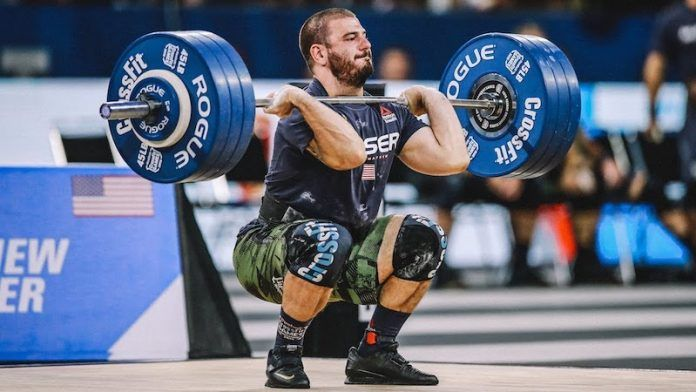


El "squat" es uno de los tres levantamientos fundamentales en el powerlifting, junto con el "bench press" (press de banca) y el "deadlift" (peso muerto). El squat, también conocido como "sentadilla" en español, es un ejercicio de levantamiento de pesas que implica levantar una barra cargada con pesas desde una posición de pie hasta una posición completamente agachada y luego volver a levantarla a una posición de pie.

La sentadilla es un ejercicio altamente intensivo para las piernas, glúteos y la parte inferior de la espalda. También trabaja varios grupos musculares importantes, incluyendo los cuádriceps, los isquiotibiales, los músculos de la espalda baja y los músculos del núcleo. Además de ser una parte esencial del entrenamiento de fuerza y acondicionamiento, la sentadilla es común en competencias de powerlifting, donde los atletas compiten por levantar la mayor cantidad de peso posible en esta disciplina.

\
En la seiguiente seccion veremos:

- **Mejores 10 registros historicos:** de Squat registrados.
- **Distribucion de atletas por genero y maximo levantamiento:** contemplando las medias de levantamiento para cada genero.
- **Relacion entre levantamiento maximo y peso corporal:** analizando el R de Pearson, r2 y fucnion de regresión.


#### **Records**

Top 10 de records de levantamientos de la categoria SQUAT.
El **record mundial es de 575kg** levantados por un hombre Finlandes de 140Kg!


In [23]:
mejor_squat = compete_df[['Name','Sex','Best3SquatKg','BodyweightKg']].sort_values(by='Best3SquatKg', ascending=False)
mejor_squat= mejor_squat.dropna()
mejor_squat.head(10)

,Name,Sex,Best3SquatKg,BodyweightKg
197118,Jonas Rantanen,M,575.00,140.00
113029,Donnie Thompson #1,M,573.79,175.77
393533,Vladislav Alhazov,M,566.99,178.60
98465,Dave Hoff,M,560.19,134.35
277021,Mike Miller,M,553.38,187.42
181793,Jeff Frank,M,552.50,182.25
28982,Andy Bolton,M,550.50,160.00
401995,Yevgen Yarymbash,M,550.00,140.65
181951,Jeff Lewis,M,550.00,250.05
1994,AJ Roberts,M,546.58,140.00


#### **Distribución y medias por género**

La media de levantamiento de SQUAT para **hombres es de 197.65 kg**, mientras que para las **mujeres es de 111.24kg** ambos siguiendo una distribucion normal


<ipython-input-24-47e88abf00f9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Female_series, label='Female', color=dred)
<ipython-input-24-47e88abf00f9>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Male_series, label='Male', color=dblue)


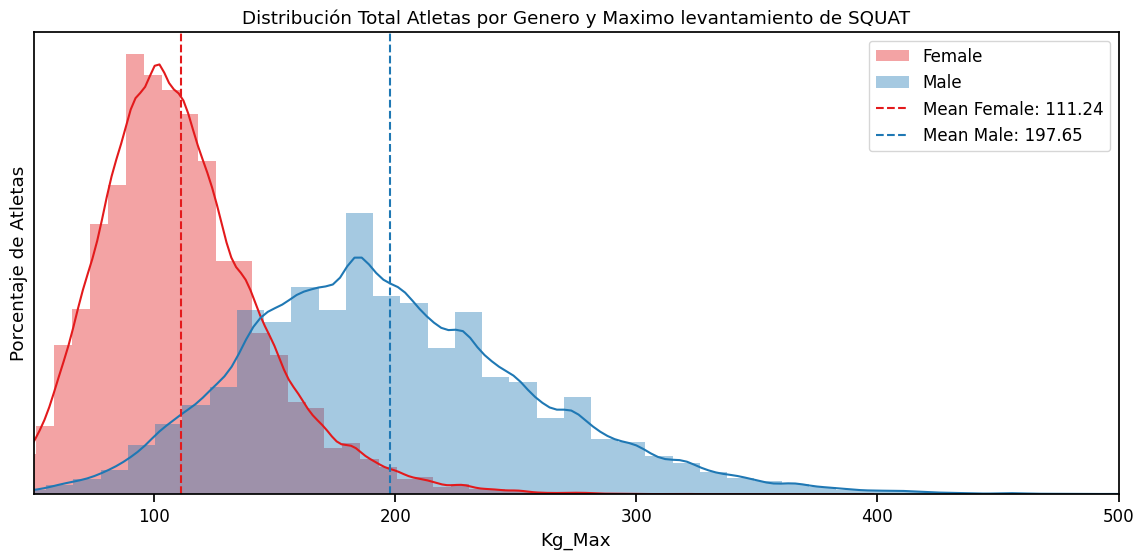

In [24]:
Male_series = mejor_squat[mejor_squat['Sex'] == 'M']['Best3SquatKg']
Female_series = mejor_squat[mejor_squat['Sex'] == 'F']['Best3SquatKg']

lred, dred, lblue, dblue = ["#fb9a99", "#e31a1c", "#a6cee3", "#1f78b4"]

plt.close('all')
plt.figure(figsize=(14, 6))
sns.set_context("notebook", font_scale=1.1)

sns.distplot(Female_series, label='Female', color=dred)
sns.distplot(Male_series, label='Male', color=dblue)
plt.legend()

# Calcula la media de Kg levantados por género
mean_male = Male_series.mean()
mean_female = Female_series.mean()

# Anota las medias en el gráfico
plt.axvline(mean_female, color=dred, linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.axvline(mean_male, color=dblue, linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.legend()

plt.title('Distribución Total Atletas por Genero y Maximo levantamiento de SQUAT')
plt.yticks([])
plt.xticks([0, 100, 200, 300, 400, 500])
plt.xlim(50, 500)  # Establece el rango del eje x de 50 a 500
plt.xlabel('Kg_Max')
plt.ylabel('Porcentaje de Atletas')
plt.show()


#### **Relacion Peso - Potencia**

- **Función de Regresión:** La función de regresión muestra que el mejor levantamiento en sentadilla ("y") aumenta en promedio 1.88 kilogramos por cada kilogramo adicional en el peso corporal ("x"). Esto indica una relación positiva entre el peso corporal y el mejor levantamiento en sentadilla. A medida que el peso corporal aumenta, se espera que el mejor levantamiento en sentadilla también aumente, y el valor de 1.88 indica la cantidad promedio de aumento en el mejor levantamiento en sentadilla por cada aumento unitario en el peso corporal.

- **R^2:** El valor de r^2 es 0.41, lo que significa que el 41% de las variaciones en los pesos máximos de levantamiento en sentadilla se explican por las variaciones en el peso de los atletas. Esto sugiere que el peso corporal es un factor significativo en el rendimiento de la sentadilla.

- **Coeficiente de Correlación de Pearson (R):** El coeficiente de correlación de Pearson (R) es 0.64, lo que indica una correlación moderada. Esta cifra respalda la relación positiva entre el peso corporal y el levantamiento en sentadilla y sugiere que el peso corporal tiene un impacto significativo en el rendimiento en esta disciplina.

Estos resultados subrayan la **importancia del peso corporal en la sentadilla** y demuestran que un mayor peso corporal se asocia con un mejor rendimiento en este levantamiento. La función de regresión proporciona una fórmula cuantitativa para entender esta relación.


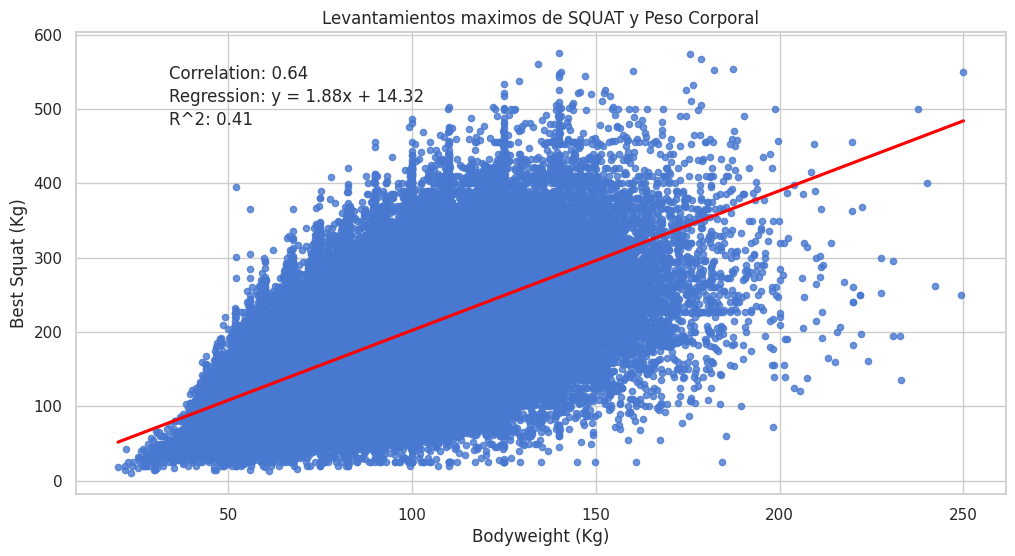

In [25]:
# Configuración de estilos
sns.set(style='whitegrid', palette='muted')

# Filtra los 10 mejores registros de SQUAT
squat_corr = mejor_squat[['Name', 'Best3SquatKg', 'BodyweightKg']]

# Crea el scatter plot con ejes invertidos
plt.figure(figsize=(12, 6))
sns.regplot(data=squat_corr, y='Best3SquatKg', x='BodyweightKg', scatter_kws={'s': 20}, line_kws={'color': 'red'}, ci=None)

# Calcula el coeficiente de correlación de Pearson
corr_coef, _ = stats.pearsonr(squat_corr['Best3SquatKg'], squat_corr['BodyweightKg'])

# Calcula los datos de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(squat_corr['BodyweightKg'], squat_corr['Best3SquatKg'])

# Calcula el coeficiente de determinación (R^2)
r_squared = r_value ** 2

# Anota los valores de correlación, regresión y R^2 en el gráfico
plt.annotate(f'Correlation: {corr_coef:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate(f'Regression: y = {slope:.2f}x + {intercept:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate(f'R^2: {r_squared:.2f}', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=12)

# Configuración del gráfico
plt.title('Levantamientos maximos de SQUAT y Peso Corporal')
plt.xlabel('Bodyweight (Kg)')
plt.ylabel('Best Squat (Kg)')

# Muestra el gráfico
plt.show()




## **Deadlift**


---


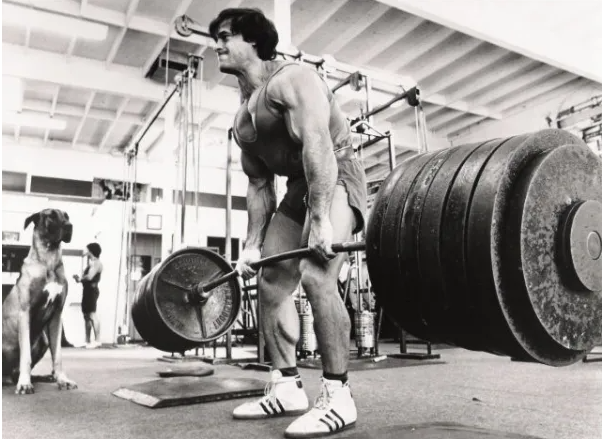

El deadlift, también conocido como "levantamiento de peso muerto" en español, es un ejercicio de levantamiento de pesas que implica levantar una barra cargada con pesas desde una posición de pie, inclinarse hacia adelante y bajar el cuerpo para agarrar la barra y luego volver a levantarla a una posición de pie.

El levantamiento de peso muerto es un ejercicio altamente intensivo que pone énfasis en los músculos de la espalda baja, los glúteos y los músculos de las piernas. También trabaja varios grupos musculares importantes, incluyendo los isquiotibiales, los músculos de la espalda, los músculos del núcleo y la fuerza del agarre. Además de ser una parte esencial del entrenamiento de fuerza y acondicionamiento, el levantamiento de peso muerto es común en competencias de powerlifting, donde los atletas compiten por levantar la mayor cantidad de peso posible en esta disciplina.

\

En la siguiente sección veremos:

- **Mejores 10 registros históricos:** de Deadlift registrados.
- **Distribución de atletas por género y máximo levantamiento:** contemplando las medias de levantamiento para cada género.
- **Relación entre levantamiento máximo y peso corporal:** analizando el R de Pearson, r^2 y función de regresión.


#### **Records**
Top 10 de levantamientos de la categoria Deadlift mas pesados. El record mundial es de 585kg levantados por un hombre Australiano de 100Kg!


In [27]:
mejor_deadlift = compete_df[['Name','Sex','Best3DeadliftKg','BodyweightKg']].sort_values(by='Best3DeadliftKg', ascending=False)
mejor_deadlift= mejor_deadlift.dropna()
mejor_deadlift.head(10)


,Name,Sex,Best3DeadliftKg,BodyweightKg
316886,Ralph Atchinson,M,585.00,100.00
47079,Benedikt Magnússon,M,460.40,172.82
28982,Andy Bolton,M,457.50,160.00
74387,Chris Duffin,M,454.14,118.52
404168,Yury Belkin,M,450.00,107.20
63704,Cailer Woolam,M,430.00,99.25
227399,Konstantīn Konstantīnovs,M,430.00,140.40
140346,Garry Frank,M,422.50,174.60
227171,Konstantin Morozov,M,422.50,125.00
346257,Sergey Daragan,M,421.00,127.50


#### **Distribución y medias por género**

La media de levantamiento de Deadlift para **hombres es de 212.32kg**, mientras que para las **mujeres es de 126.46kg**, ambos siguiendo una distribucion normal


<ipython-input-28-73da5c26bc76>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Male_series = mejor_deadlift[mejor_squat['Sex'] == 'M']['Best3DeadliftKg']
<ipython-input-28-73da5c26bc76>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Female_series, label='Female', color=dred)
<ipython-input-28-73da5c26bc76>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new func

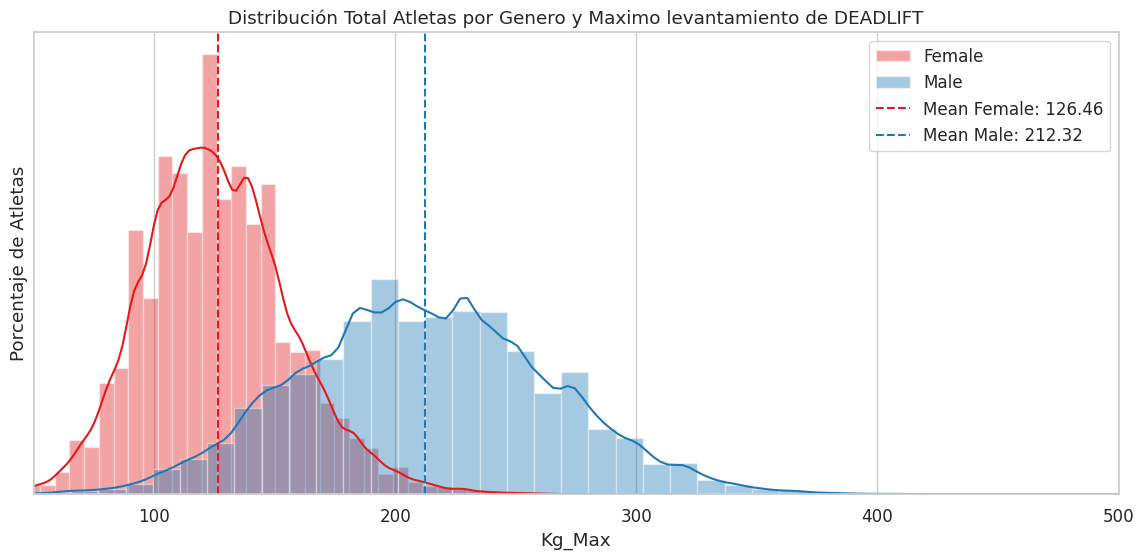

In [28]:

Male_series = mejor_deadlift[mejor_squat['Sex'] == 'M']['Best3DeadliftKg']
Female_series = mejor_deadlift[mejor_deadlift['Sex'] == 'F']['Best3DeadliftKg']

lred, dred, lblue, dblue = ["#fb9a99", "#e31a1c", "#a6cee3", "#1f78b4"]

plt.close('all')
plt.figure(figsize=(14, 6))
sns.set_context("notebook", font_scale=1.1)

sns.distplot(Female_series, label='Female', color=dred)
sns.distplot(Male_series, label='Male', color=dblue)
plt.legend()

# Calcula la media de Kg levantados por género
mean_male = Male_series.mean()
mean_female = Female_series.mean()

# Anota las medias en el gráfico
plt.axvline(mean_female, color=dred, linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.axvline(mean_male, color=dblue, linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.legend()

plt.title('Distribución Total Atletas por Genero y Maximo levantamiento de DEADLIFT')
plt.yticks([])
plt.xticks([0, 100, 200, 300, 400, 500])
plt.xlim(50, 500)  # Establece el rango del eje x de 50 a 500
plt.xlabel('Kg_Max')
plt.ylabel('Porcentaje de Atletas')
plt.show()


#### **Relacion Peso - Potencia**

- **Función de Regresión:** La función de regresión muestra que el mejor levantamiento en peso muerto ("y") aumenta en promedio 1.64 kilogramos por cada kilogramo adicional en el peso corporal ("x"). Esto indica una relación positiva entre el peso corporal y el mejor levantamiento en peso muerto. A medida que el peso corporal aumenta, se espera que el mejor levantamiento en peso muerto también aumente, y el valor de 1.64 indica la cantidad promedio de aumento en el mejor levantamiento en peso muerto por cada aumento unitario en el peso corporal.

- **R^2:** El valor de r^2 es 0.39, lo que significa que el 39% de las variaciones en los pesos máximos de levantamiento en peso muerto se explican por las variaciones en el peso de los atletas. Esto sugiere que el peso corporal es un factor significativo en el rendimiento del peso muerto.

- **Coeficiente de Correlación de Pearson (R):** El coeficiente de correlación de Pearson (R) es 0.62, lo que indica una correlación moderada. Esta cifra respalda la relación positiva entre el peso corporal y el levantamiento en peso muerto y sugiere que el peso corporal tiene un impacto significativo en el rendimiento en esta disciplina.



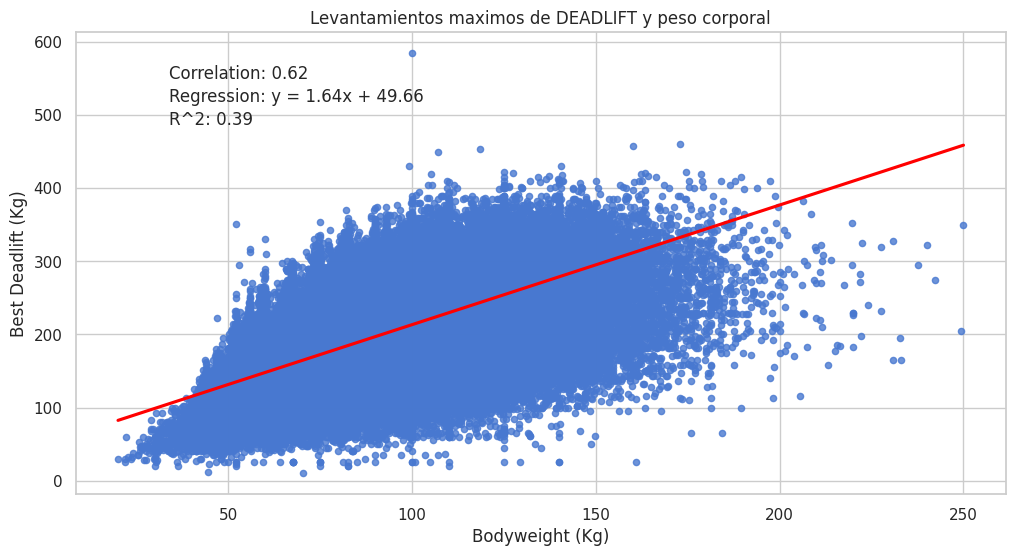

In [29]:
# Configuración de estilos
sns.set(style='whitegrid', palette='muted')

# Filtra los 10 mejores registros de SQUAT
squat_corr = mejor_deadlift[['Name', 'Best3DeadliftKg', 'BodyweightKg']]

# Crea el scatter plot con ejes invertidos
plt.figure(figsize=(12, 6))
sns.regplot(data=squat_corr, y='Best3DeadliftKg', x='BodyweightKg', scatter_kws={'s': 20}, line_kws={'color': 'red'}, ci=None)

# Calcula el coeficiente de correlación de Pearson
corr_coef, _ = stats.pearsonr(squat_corr['Best3DeadliftKg'], squat_corr['BodyweightKg'])

# Calcula los datos de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(squat_corr['BodyweightKg'], squat_corr['Best3DeadliftKg'])

# Calcula el coeficiente de determinación (R^2)
r_squared = r_value ** 2

# Anota los valores de correlación, regresión y R^2 en el gráfico
plt.annotate(f'Correlation: {corr_coef:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate(f'Regression: y = {slope:.2f}x + {intercept:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate(f'R^2: {r_squared:.2f}', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=12)

# Configuración del gráfico
plt.title('Levantamientos maximos de DEADLIFT y peso corporal')
plt.xlabel('Bodyweight (Kg)')
plt.ylabel('Best Deadlift (Kg)')

# Muestra el gráfico
plt.show()

## **Bench Press**


---


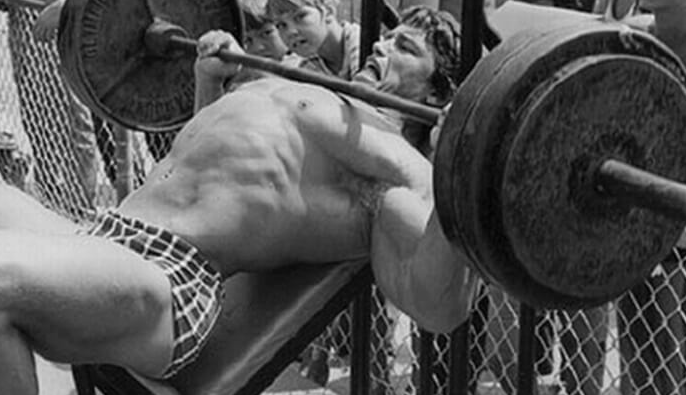

El "press de banca" es uno de los tres levantamientos fundamentales en el powerlifting, junto con el "squat" (sentadilla) y el "deadlift" (peso muerto). El press de banca es un ejercicio de levantamiento de pesas que implica acostarse en un banco y levantar una barra cargada con pesas desde el pecho hasta la posición extendida de los brazos.

Este ejercicio se enfoca en el fortalecimiento de los músculos del pecho, los tríceps y los hombros, siendo un elemento esencial en el entrenamiento de fuerza y acondicionamiento. También es común en competencias de powerlifting, donde los atletas compiten por levantar la mayor cantidad de peso posible en esta disciplina.

\

En la siguiente sección, exploraremos:

- **Los 10 mejores registros históricos:** de Press de Banca registrados.
- **Distribución de atletas por género y su máximo levantamiento:** considerando las medias de levantamiento para cada género.
- **Relación entre el levantamiento máximo y el peso corporal:** analizando el coeficiente de correlación de Pearson (R), r^2 y la función de regresión.


#### **Records**
Top 10 de records de levantamientos de la categoria PRESS DE BANCA. **El record mundial es de 488.5Kg** levantados por un hombre Noruego de 159Kg!


In [30]:
mejor_press = compete_df[['Name','Sex','Best3BenchKg','BodyweightKg']].sort_values(by='Best3BenchKg', ascending=False)
mejor_press= mejor_press.dropna()
mejor_press.head(10)

,Name,Sex,Best3BenchKg,BodyweightKg
374343,Tiny Meeker,M,488.50,156.90
98465,Dave Hoff,M,455.86,134.35
50052,Blaine Sumner,M,455.00,178.58
397917,Will Barotti,M,430.91,148.69
189217,Jimmy Kolb,M,430.91,110.00
113029,Donnie Thompson #1,M,430.91,175.77
277583,Mike Womack,M,427.50,157.03
45370,Barzeen Vaziri,M,425.00,163.57
264466,Matt Minuth,M,420.00,109.77
175983,Jani Murtomäki,M,420.00,158.98


#### **Distribución y medias por género**
La media de levantamiento de Pres para **hombres es de 130.88kg, mientras que para las mujeres es de 60.44kg**, ambos siguiendo una distribucion normal


<ipython-input-31-a41288abc998>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Female_series, label='Female', color=dred)
<ipython-input-31-a41288abc998>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Male_series, label='Male', color=dblue)


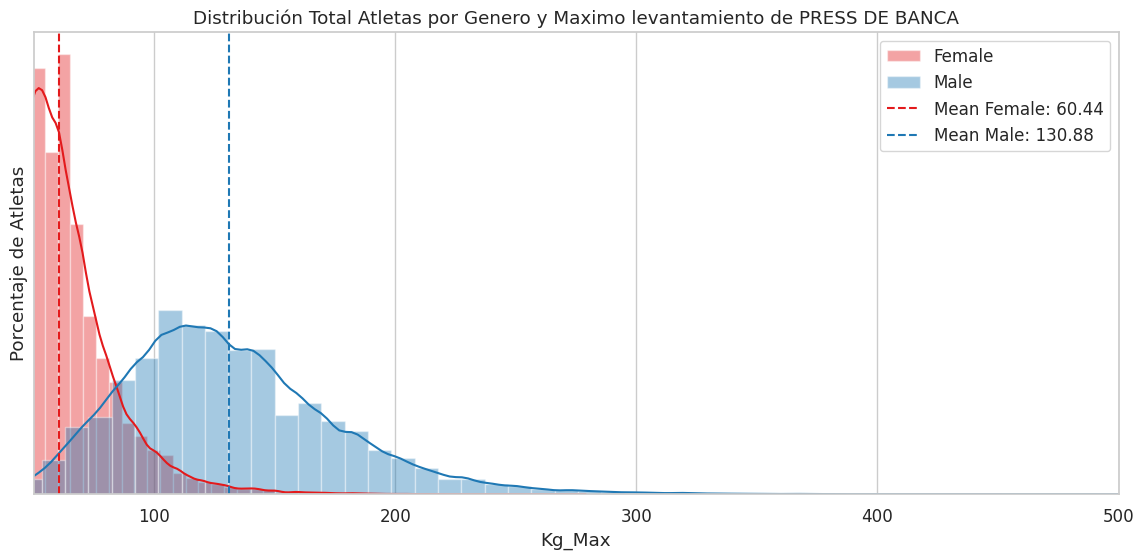

In [31]:

Male_series = mejor_press[mejor_press['Sex'] == 'M']['Best3BenchKg']
Female_series = mejor_press[mejor_press['Sex'] == 'F']['Best3BenchKg']

lred, dred, lblue, dblue = ["#fb9a99", "#e31a1c", "#a6cee3", "#1f78b4"]

plt.close('all')
plt.figure(figsize=(14, 6))
sns.set_context("notebook", font_scale=1.1)

sns.distplot(Female_series, label='Female', color=dred)
sns.distplot(Male_series, label='Male', color=dblue)
plt.legend()

# Calcula la media de Kg levantados por género
mean_male = Male_series.mean()
mean_female = Female_series.mean()

# Anota las medias en el gráfico
plt.axvline(mean_female, color=dred, linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.axvline(mean_male, color=dblue, linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.legend()

plt.title('Distribución Total Atletas por Genero y Maximo levantamiento de PRESS DE BANCA')
plt.yticks([])
plt.xticks([0, 100, 200, 300, 400, 500])
plt.xlim(50, 500)  # Establece el rango del eje x de 50 a 500
plt.xlabel('Kg_Max')
plt.ylabel('Porcentaje de Atletas')
plt.show()
#### **Relacion Peso - Potencia**


#### **Relacion Peso - Potencia**

- **Función de Regresión:** La función de regresión muestra que el mejor levantamiento en press de banca ("y") aumenta en promedio 1.42 kilogramos por cada kilogramo adicional en el peso corporal ("x"). Esto indica una relación positiva entre el peso corporal y el mejor levantamiento en press de banca, donde un mayor peso corporal se correlaciona con un mayor levantamiento en press de banca.

- **R^2:** El valor de r^2 es 0.42, lo que significa que el 42% de las variaciones en los pesos máximos de levantamiento en press de banca se explican por las variaciones en el peso de los atletas. Esto sugiere que el peso corporal es un factor significativo en el rendimiento del press de banca.

- **Coeficiente de Correlación de Pearson (R):** El coeficiente de correlación de Pearson (R) es 0.65, lo que indica una correlación moderada. Esta cifra respalda la relación positiva entre el peso corporal y el levantamiento en press de banca y sugiere que el peso corporal tiene un impacto significativo en el rendimiento en esta disciplina.



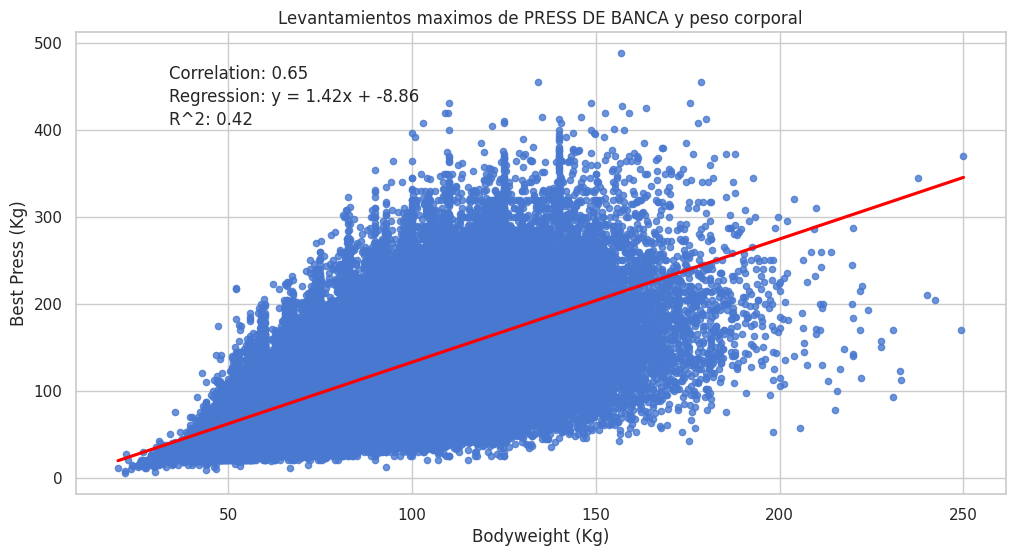

In [32]:
# Configuración de estilos
sns.set(style='whitegrid', palette='muted')

# Filtra los 10 mejores registros de SQUAT
squat_corr = mejor_press[['Name', 'Best3BenchKg', 'BodyweightKg']]

# Crea el scatter plot con ejes invertidos
plt.figure(figsize=(12, 6))
sns.regplot(data=squat_corr, y='Best3BenchKg', x='BodyweightKg', scatter_kws={'s': 20}, line_kws={'color': 'red'}, ci=None)

# Calcula el coeficiente de correlación de Pearson
corr_coef, _ = stats.pearsonr(squat_corr['Best3BenchKg'], squat_corr['BodyweightKg'])

# Calcula los datos de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(squat_corr['BodyweightKg'], squat_corr['Best3BenchKg'])

# Calcula el coeficiente de determinación (R^2)
r_squared = r_value ** 2

# Anota los valores de correlación, regresión y R^2 en el gráfico
plt.annotate(f'Correlation: {corr_coef:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate(f'Regression: y = {slope:.2f}x + {intercept:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12)
plt.annotate(f'R^2: {r_squared:.2f}', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=12)

# Configuración del gráfico
plt.title('Levantamientos maximos de PRESS DE BANCA y peso corporal')
plt.xlabel('Bodyweight (Kg)')
plt.ylabel('Best Press (Kg)')

# Muestra el gráfico
plt.show()

## **Resumen y Conclusiones**


---


En este análisis de datos de Powerlifting, hemos investigado la relación entre el peso corporal y el rendimiento en tres levantamientos fundamentales: Sentadilla (Squat), Press de Banca (Bench Press) y Peso Muerto (Deadlift). A través de funciones de regresión, coeficientes de correlación y r^2, hemos revelado patrones interesantes:

\
- El **peso corporal influye significativamente** en el rendimiento en cada uno de los levantamientos. En todos los casos, un mayor peso corporal se correlaciona con un mejor rendimiento.

- En el caso de **Sentadilla (Squat)**, la función de regresión mostró un aumento promedio de 1.88 kg en el mejor levantamiento por cada kg adicional en el peso corporal. El r^2 de 0.41 indica que el 41% de las variaciones en los pesos máximos se explican por las variaciones en el peso de los atletas. El coeficiente de correlación de Pearson (R) fue 0.64, indicando una correlación moderada.

- En el **Press de Banca (Bench Press)**, la función de regresión reveló un aumento promedio de 1.42 kg en el mejor levantamiento por cada kg adicional en el peso corporal. El r^2 fue 0.42, con un coeficiente de correlación (R) de 0.65.

- En el **Peso Muerto (Deadlift)**, la función de regresión mostró un aumento promedio de 1.64 kg en el mejor levantamiento por cada kg adicional en el peso corporal. El r^2 fue 0.39, con un coeficiente de correlación (R) de 0.62.

\

Estos resultados subrayan la importancia del peso corporal en el rendimiento en Powerlifting y proporcionan una base sólida para comprender cómo el peso corporal influye en los resultados. Esta información es valiosa tanto para atletas como para entrenadores, ya que les permite tomar decisiones informadas sobre su entrenamiento y competencias.
